In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from gensim.models import KeyedVectors
# This notebook feeds the spam SMS corpus into word2vec and trains
# logistic regression on the 300-dimensional vector resulting from
# word2vec embedding.

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} numpy matplotlib pandas nltk word2vec gensim


In [ ]:
! conda env list

In [ ]:
!conda list | grep numpy

In [2]:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [4]:
wv = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
# Okay, this demo has wv.most_similar.. which takes a "positive" and a "negative" list of words
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html
print(wv.most_similar(positive=['mushroom'], topn=5))

In [ ]:
print(wv.most_similar(positive=['mushroom', "onion", "garlic", "tofu"], topn=5))

In [ ]:
print(wv.most_similar(positive=['mushroom', "onion", "garlic", "chicken"], topn=5))

In [ ]:
print(wv.most_similar(positive=['dropout', "invest"], negative=["graduate"], topn=5))

In [ ]:
# Okay, Cookie, which one of these things is not like the others?
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

In [ ]:
# https://radimrehurek.com/gensim/models/word2vec.html
from gensim.models import KeyedVectors

In [ ]:
vector = wv['computer']  # Get word2vec number for a word 
vector

In [ ]:
plt.hist(vector, bins=30)

In [ ]:
# Are these vectors normalized?
np.sum( np.dot ( vector, vector) ) 

In [5]:
# Load, parse the Singapore spam corpus, load into dataframe "spam"
spam =pd.read_csv("../data/spam.csv", encoding="latin-1")
spamclean = []
for line in open("../data/spam.csv", encoding="latin-1"):
        a = line.find(",")
        spamclean.append((line[0:a], line[a+1:]))
spam = pd.DataFrame(spamclean)
spam = spam.drop(labels=0, axis=0)  #only do this once
spam =spam.rename({0: "label", 1:"text"}, axis=1)

In [6]:
# DIY train/test split 
ind = np.argsort(np.random.random(len(spam)))
spam_test = spam.iloc[ind[0:450],:] 
spam_train = spam.iloc[ind[450:],:] 

In [7]:
Ytrain = spam_train.loc[:,"label"] == "spam" 
Xtrain = spam_train.loc[:,"text"]
Ytest = spam_test.loc[:,"label"] == "spam" 
Xtest = spam_test.loc[:,"text"]

In [8]:
Y = np.array(Ytrain)

In [9]:
Xtrain.iloc[0]

'I agree. So i can stop thinkin about ipad. Can you please ask macho the same question.,,,\n'

In [10]:
def string_to_vec(s):
    tok1 = nltk.word_tokenize(s)
    print(dir(tok1))


In [14]:
string_to_vec(Xtest.iloc[0])

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [15]:
tokens =nltk.word_tokenize(Xtest.iloc[0])

In [16]:
for t in tokens:
    print(t)

cThen
i
thk
shd
b
enuff
..
Still
got
conclusion
n
contents
pg
n
references
..
I
'll
b
doing
da
contents
pg
n
cover
pg
..
,
,
,


In [17]:
for t in tokens:
    print(dir(t))
    break

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [22]:
def string_to_vec(s):
    N=300
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        c = wv[token]
        t = t+c
        print(t[0:10])

In [23]:
string_to_vec("hat") [ 0 :10]

[-0.12451172 -0.0201416  -0.20410156 -0.125      -0.16894531 -0.12011719
  0.06298828 -0.11328125  0.24707031  0.13085938]


TypeError: 'NoneType' object is not subscriptable

In [24]:
string_to_vec("hat box") - string_to_vec("box hat")

[-0.12451172 -0.0201416  -0.20410156 -0.125      -0.16894531 -0.12011719
  0.06298828 -0.11328125  0.24707031  0.13085938]
[-0.22070312 -0.05773926 -0.53808594  0.00878906 -0.07373047 -0.20507812
  0.01489258 -0.13562012  0.32226562  0.19287109]
[-0.09619141 -0.03759766 -0.33398438  0.13378906  0.09521484 -0.08496094
 -0.0480957  -0.02233887  0.07519531  0.06201172]
[-0.22070312 -0.05773926 -0.53808594  0.00878906 -0.07373047 -0.20507812
  0.01489258 -0.13562012  0.32226562  0.19287109]


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [25]:
def string_to_vec(s):
    N=300
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        c = wv[token]
        t = t+c
        #print(t)
    return(t / len(tok1))

In [26]:
# TESTS
h1 = string_to_vec("hat box")
h2 = string_to_vec("box hat")
np.sum(np.abs(h1-h2))

0.0

In [27]:
h1 = string_to_vec("hat")
h2 = string_to_vec("hat hat")
np.sum(np.abs(h1-h2))

0.0

In [28]:
h1 = string_to_vec("hat")
h2 = string_to_vec("cat")
np.sum(np.abs(h1-h2))

54.71977138519287

In [29]:
# Yeah, and what happens when I ask for a word that's not in the dictionary?
wv["nonexitsers"]

KeyError: "Key 'nonexitsers' not present"

In [30]:
h1[0:10], h2[0:10]

(array([-0.12451172, -0.0201416 , -0.20410156, -0.125     , -0.16894531,
        -0.12011719,  0.06298828, -0.11328125,  0.24707031,  0.13085938]),
 array([ 0.0123291 ,  0.20410156, -0.28515625,  0.21679688,  0.11816406,
         0.08300781,  0.04980469, -0.00952148,  0.22070312, -0.12597656]))

In [31]:
# MORE TESTS: make sure handles nonsense words
h1 = string_to_vec("glibberfobble in the wind")

KeyError: "Key 'glibberfobble' not present"

In [32]:
def string_to_vec(s):
    N=300
    n=0
    t = np.zeros(300)
    tok1 = nltk.word_tokenize(s)
    for token in tok1:
        try:
            c = wv[token]
            t = t+c
            n = n+1
        except KeyError:
            pass
    return(t / n)

In [33]:
h1 = string_to_vec("glibberfobble in the wind")
h2 = string_to_vec("in the wind")

np.sum(np.abs(h1-h2))

0.0

In [59]:
X2 = Xtrain.apply(string_to_vec)
XTEST2 = Xtest.apply(string_to_vec)

In [35]:
X2.shape

(5124,)

In [ ]:
X2

In [39]:
type(X2)

pandas.core.series.Series

In [ ]:
X2[0:3]

In [ ]:
# Series of arrays...

In [60]:
X = np.stack(X2.values)
X[np.isnan(X)] = 0
XTEST = np.stack(XTEST2.values)
XTEST[np.isnan(XTEST) ] = 0
type(X), X.shape, type(XTEST), XTEST.shape

(numpy.ndarray, (5124, 300), numpy.ndarray, (450, 300))

In [48]:
from numpy.random import permutation
scramble = permutation(len(X))
len(X)

5124

In [49]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [50]:
np.isnan(X).sum()

4200

In [51]:
np.isnan(X).sum()

4200

In [54]:
model = LogisticRegression().fit(X, Ytrain*1.0)

In [ ]:
# modelcv = LogisticRegressionCV().fit(X, Y*1.0) 
# AttributeError: 'str' object has no attribute 'decode' 
#  f**ing unicode error in scipy?

In [61]:
Ypred =model.predict(XTEST)

In [62]:
model.score(XTEST,Ytest)

0.9644444444444444

In [63]:
type(Ytest)

pandas.core.series.Series

In [64]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [65]:
type(Y)

numpy.ndarray

In [66]:
from sklearn.metrics import roc_curve
# fpr, tpr, thresholds  = roc_curve(y_true, y_score)
yscores_embedding0 = model.predict_proba(XTEST)[:,1]
fpr, tpr, thresholds = roc_curve ( Ytest.values, yscores_embedding0)

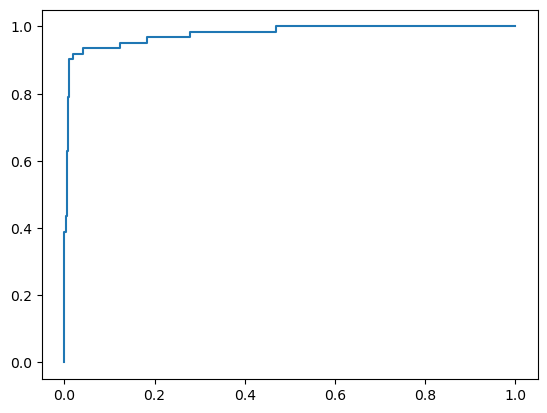

In [68]:
plt.plot(fpr, tpr)

In [70]:
yscores_embedding0.shape, Ytest.shape

((450,), (450,))

In [71]:
# Model 2: logisticregressionCV
model2 = LogisticRegressionCV(max_iter=500).fit(X, Ytrain)

/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [74]:
X.shape, Y.shape

((5124, 300), (5124,))

In [75]:
yscores_embeddingCV = model2.predict_proba(XTEST)[:,1]
fpr2, tpr2, thresholds2 = roc_curve ( Ytest.values, yscores_embeddingCV)

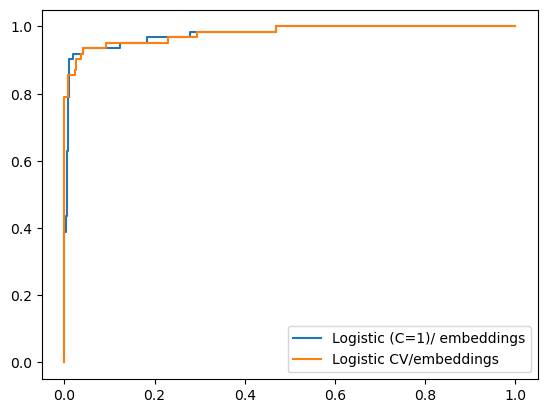

In [77]:
plt.plot(fpr, tpr, label="Logistic (C=1)/ embeddings")
plt.plot(fpr2, tpr2, label="Logistic CV/embeddings")
plt.legend()

(0.75, 1.01)

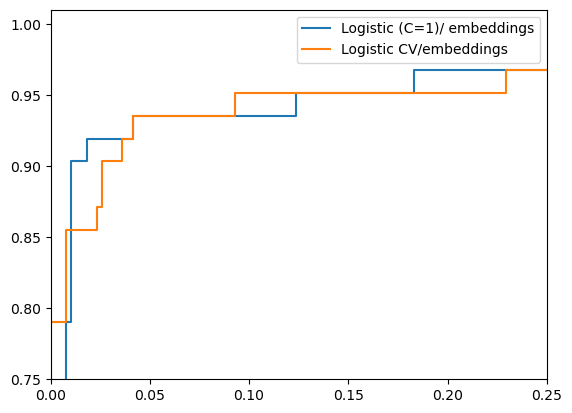

In [78]:
plt.plot(fpr, tpr, label="Logistic (C=1)/ embeddings")
plt.plot(fpr2, tpr2, label="Logistic CV/embeddings")
plt.legend()
plt.xlim(0,0.25); plt.ylim(0.75,1.01)

In [79]:
fpr[10:20], fpr2[10:20], fpr.shape

(array([0.00773196, 0.01030928, 0.01030928, 0.01804124, 0.01804124,
        0.04123711, 0.04123711, 0.04639175, 0.05154639, 0.05927835]),
 array([0.03608247, 0.03608247, 0.04123711, 0.04123711, 0.04896907,
        0.05412371, 0.06185567, 0.06701031, 0.09278351, 0.09278351]),
 (40,))

In [80]:
from sklearn.svm import SVC

In [81]:
svc = SVC(probability=True).fit(X, Y)

In [82]:
svc.score(XTEST, Ytest)

0.98

In [83]:
yscores_svc = svc.predict_proba(XTEST)[:,1]
fpr3, tpr3, thresholds3 = roc_curve ( Ytest.values, yscores_svc)

(0.5, 1.0)

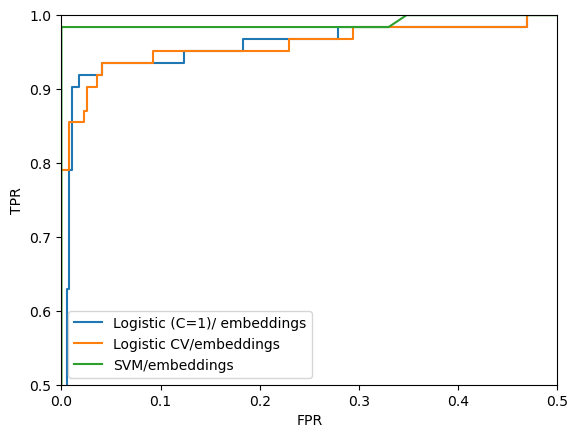

In [100]:
plt.plot(fpr, tpr, label="Logistic (C=1)/ embeddings")
plt.plot(fpr2, tpr2, label="Logistic CV/embeddings")
plt.plot(fpr3, tpr3, label="SVM/embeddings")
plt.legend(); plt.xlabel("FPR"), plt.ylabel("TPR")
plt.legend()
plt.xlim(0, 0.5); plt.ylim(0.5,1)

In [219]:
def assign_d1_d2():
# train/ test split
    ind = np.argsort(np.random.random(len(spam)))
    spam_test = spam.iloc[ind[0:450],:] 
    spam_train = spam.iloc[ind[450:],:] 
    # Create two dataframes.. 
    s1 = spam_train.query("label == 'ham'")
    s2 = spam_train.query("label == 'spam'")
    # Create two giant strings... 
    s1text = s1.text.str.cat()
    s2text = s2.text.str.cat()
    # tokenize the strings (proably split on whitespace)
    tok1 = nltk.word_tokenize(s1text)
    tok2 = nltk.word_tokenize(s2text)
    # And create frequency distribution objects.
    d1 = nltk.FreqDist(tok1)
    d2 = nltk.FreqDist(tok2)
    return(spam_test, spam_train, d1, d2)

In [163]:
DEBUG=0
def score(utterance):
    cumscore = 0
    NHAM = d1.N()
    NSPAM = d2.N()
    MAXSCORE = np.log(100) / np.log(2)
    MINSCORE_HAM = np.log( 0.1 / d1.N() ) / np.log(2)
    MINSCORE_SPAM = np.log( 0.1 / d2.N() ) / np.log(2)

    for token in nltk.word_tokenize(utterance):
        partialscore=0  # Catchall if a word has too few instances
        if d1[token] != 0 and d2[token] != 0 and (d1[token]+d2[token]):
            partialscore = (np.log(d1[token]) - np.log(NHAM) -
                            np.log(d2[token])  + np.log(NSPAM))/np.log(2) 
            partialscore = np.minimum(MAXSCORE, np.maximum(-MAXSCORE, partialscore))
            if DEBUG: 
                print(partialscore, d1[token], d2[token])
        if d1[token] == 0 and d2[token] > 0:
            partialscore = -MAXSCORE
        if d2[token] == 0 and d1[token]> 0 :
            partialscore = MAXSCORE
        if d2[token] == 0 and d1[token] == 0 :
            partialscore = MINSCORE_HAM - MINSCORE_SPAM 
        cumscore = cumscore + partialscore
    return(cumscore)

In [164]:
score("free"), score("tomorrow")

(-2.4402068938257746, 1.3065264765892506)

In [165]:
nbc_scores = Xtest.apply(score)

(array([2., 1., 2., 3., 5., 3., 6., 4., 5., 3., 4., 3., 4., 1., 6., 1., 3.,
        1., 1., 4., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-142.06683648, -136.82130256, -131.57576863, -126.33023471,
        -121.08470079, -115.83916686, -110.59363294, -105.34809901,
        -100.10256509,  -94.85703117,  -89.61149724,  -84.36596332,
         -79.12042939,  -73.87489547,  -68.62936155,  -63.38382762,
         -58.1382937 ,  -52.89275977,  -47.64722585,  -42.40169193,
         -37.156158  ,  -31.91062408,  -26.66509016,  -21.41955623,
         -16.17402231,  -10.92848838,   -5.68295446,   -0.43742054,
           4.80811339,   10.05364731,   15.29918124]),
 <BarContainer object of 30 artists>)

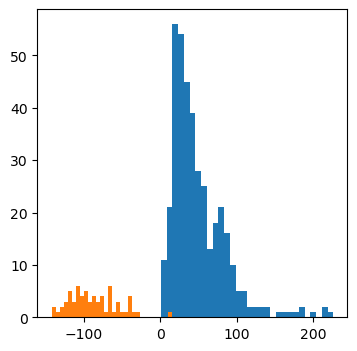

In [166]:
fig, ax = plt.subplots(figsize=(4,4))
plt.hist(nbc_scores[Ytest==0], bins=30)
plt.hist(nbc_scores[Ytest==1], bins=30)

In [179]:
thresholds_nbc = np.arange(-100, 200, 1)
def roc_curve2(yscores, ytest, thresholds):
    fprs = []
    tprs = []
    for thresh in thresholds:
        tpr = np.sum ( ( yscores < thresh ) *  (ytest == 1)) / np.sum (ytest==1)
        fpr = np.sum ( ( yscores < thresh ) *  (ytest == 0)) / np.sum (ytest==0) 
        fprs.append(fpr)
        tprs.append(tpr)
 #       print(thresh, tpr, fpr)
    tpr=np.array(tprs)
    fpr=np.array(fprs)
    return(fpr, tpr, thresholds)

In [168]:
fpr4, tpr4, threshnbc = roc_curve2(nbc_scores, Ytest, thresholds_nbc) 

-100 0.4 0.0
-99 0.4307692307692308 0.0
-98 0.4307692307692308 0.0
-97 0.4307692307692308 0.0
-96 0.4461538461538462 0.0
-95 0.46153846153846156 0.0
-94 0.47692307692307695 0.0
-93 0.49230769230769234 0.0
-92 0.5076923076923077 0.0
-91 0.5230769230769231 0.0
-90 0.5230769230769231 0.0
-89 0.5384615384615384 0.0
-88 0.5384615384615384 0.0
-87 0.5538461538461539 0.0
-86 0.5538461538461539 0.0
-85 0.5846153846153846 0.0
-84 0.5846153846153846 0.0
-83 0.6 0.0
-82 0.6153846153846154 0.0
-81 0.6153846153846154 0.0
-80 0.6307692307692307 0.0
-79 0.6307692307692307 0.0
-78 0.6461538461538462 0.0
-77 0.6615384615384615 0.0
-76 0.6923076923076923 0.0
-75 0.6923076923076923 0.0
-74 0.6923076923076923 0.0
-73 0.7076923076923077 0.0
-72 0.7076923076923077 0.0
-71 0.7076923076923077 0.0
-70 0.7076923076923077 0.0
-69 0.7076923076923077 0.0
-68 0.7076923076923077 0.0
-67 0.7076923076923077 0.0
-66 0.7384615384615385 0.0
-65 0.7692307692307693 0.0
-64 0.7692307692307693 0.0
-63 0.8 0.0
-62 0.8 0.0
-61

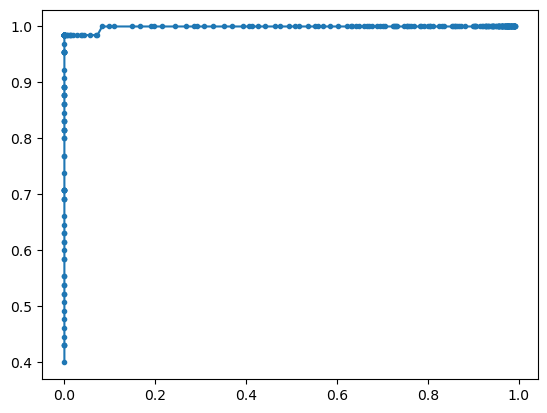

In [169]:
plt.plot(fpr4, tpr4, '.-')

Text(0.5, 1.0, 'ROC for three different spamclassifiers')

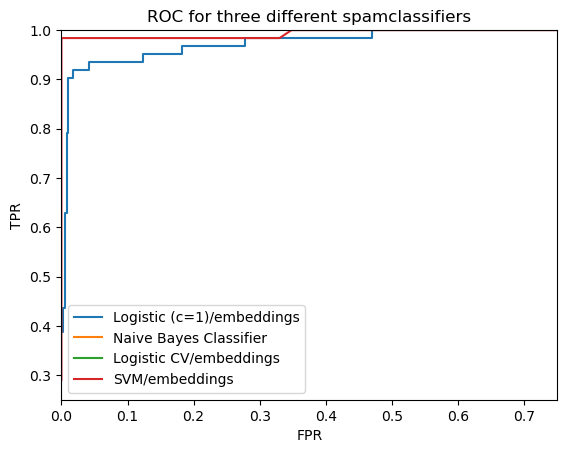

In [104]:
plt.plot(fpr, tpr, label="Logistic (c=1)/embeddings")
plt.plot(fpr4, tpr4, label="Naive Bayes Classifier")
plt.plot(fpr2, tpr2, label="Logistic CV/embeddings")
plt.plot(fpr3, tpr3, label="SVM/embeddings")

plt.legend(); plt.xlabel("FPR"), plt.ylabel("TPR")
plt.xlim(0, 0.75); plt.ylim(0.25,1)
plt.title("ROC for three different spamclassifiers")

In [ ]:
# GROWL  aside from the SVC dominating over logistic regression, I can't really tell for 
# the NBC.  The assessment of accuracy has too much variance.

In [ ]:
# sklearn.roc_curve may not work for this 
# First time I tried this I got a numpy error trying to array a ragged list; a list of lists with different lengths.
    # documentation for roc_curve isn't helpful, but stackoverflow says it really does try every possible threshold, 
    # then omits "useless" points.  This results in different randomizations getting slightly different array lengths,
    # so combining the results of these experiments is not a simple .sum(axis=0).  Easiest way out: write my own roc_curve.


In [105]:
Xtrain

2216    Ok then i'll let him noe later n ask him call ...
3168    "HOT LIVE FANTASIES call now 08707509020 Just ...
5144    FREE for 1st week! No1 Nokia tone 4 ur mobile ...
3002    Id onluy matters when getting on from offcampu...
62      Ha ha ha good joke. Girls are situation seeker...
                              ...                        
1731              Lol yeah at this point I guess not,,,\n
4962       I want  &lt;#&gt;  rs da:)do you have it?,,,\n
1112                         Ok ill tell the company,,,\n
5100    Sorry about that this is my mates phone and i ...
1489                 I told your number to gautham..,,,\n
Name: text, Length: 5124, dtype: object

In [107]:
spam

,label,text
1,ham,"""Go until jurong point, crazy.. Available only..."
2,ham,"Ok lar... Joking wif u oni...,,,\n"
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"""Nah I don't think he goes to usf, he lives ar..."
...,...,...
5570,spam,"""This is the 2nd time we have tried 2 contact ..."
5571,ham,"Will Ì_ b going to esplanade fr home?,,,\n"
5572,ham,"""Pity, * was in mood for that. So...any other ..."
5573,ham,The guy did some bitching but I acted like i'd...


In [110]:
from sklearn.model_selection import train_test_split
spam["V"] = spam.text.apply(string_to_vec)
spam

,label,text,V
1,ham,"""Go until jurong point, crazy.. Available only...","[0.010850694444444444, 0.047902425130208336, 0..."
2,ham,"Ok lar... Joking wif u oni...,,,\n","[-0.11147054036458333, 0.07672119140625, 0.043..."
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[-0.051667213439941406, -0.04751459757486979, ..."
4,ham,U dun say so early hor... U c already then say...,"[-0.06303821910511363, 0.034928755326704544, 0..."
5,ham,"""Nah I don't think he goes to usf, he lives ar...","[0.05560772235576923, 0.07440655048076923, 0.0..."
...,...,...,...
5570,spam,"""This is the 2nd time we have tried 2 contact ...","[-0.006640116373697917, 0.019994099934895832, ..."
5571,ham,"Will Ì_ b going to esplanade fr home?,,,\n","[0.08180745442708333, 0.09928385416666667, 0.0..."
5572,ham,"""Pity, * was in mood for that. So...any other ...","[0.002893621271306818, 0.05216286399147727, 0...."
5573,ham,The guy did some bitching but I acted like i'd...,"[0.06040283203125, 0.04278251647949219, 0.0256..."


In [172]:
X = spam.V
Y = (spam.label == "spam") * 1.0

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1)
np.array(X_test).shape

(558,)

In [144]:
np.stack(X_train).shape

(5016, 300)

In [155]:
yscores = model2.predict_proba(X_test)[:,1]
Y_test

3740     ham
563      ham
1455     ham
529      ham
2462     ham
        ... 
4657     ham
203      ham
2475     ham
912      ham
3861    spam
Name: label, Length: 558, dtype: object

In [180]:
# Now I am going to try to smooth out these ROC curves by repeating the train/test split
tpr5=[]
fpr5=[]
for i in range(20):
    print(i)
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1)
    X_train=np.stack(X_train)
    X_test=np.stack(X_test)
    X_train[np.isnan(X_train)]=0
    X_test[np.isnan(X_test)]=0
    model2 = LogisticRegression(max_iter=500).fit(np.stack(X_train), Y_train.values)
    yscores = model2.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve2 ( yscores, Y_test.values,np.arange(.01, .99, .01))
    fpr5.append(fpr)
    tpr5.append(tpr)
tpr_LR  = np.array(tpr5)
fpr_LR = np.array(fpr5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0.5, 1.0, 'Single instance and average of 20\n ROCs for logistic regression / embeddngs')

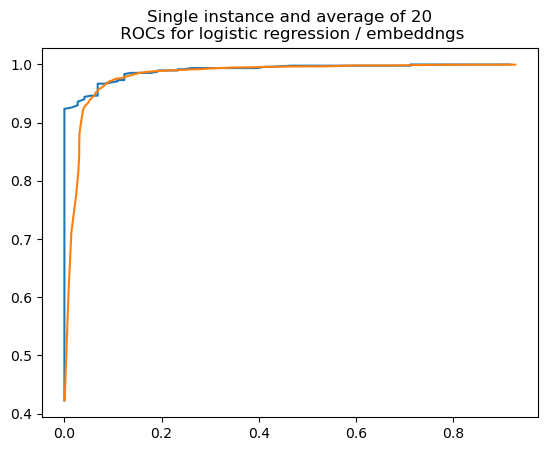

In [184]:
plt.plot(tpr, fpr)
plt.plot(tprs.mean(axis=0), fprs.mean(axis=0))
plt.title("Single instance and average of 20\n ROCs for logistic regression / embeddngs")

In [195]:
# Write a function...
# Now I am going to try to smooth out these ROC curves by repeating the train/test split
def get_smooth_roc(function, n=20):
    tpr5=[]
    fpr5=[]
    for i in range(n):
        print(i)
        X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1)
        X_train=np.stack(X_train)
        X_test=np.stack(X_test)
        X_train[np.isnan(X_train)]=0
        X_test[np.isnan(X_test)]=0
        model2 = function(probability=True,max_iter=500).fit(np.stack(X_train), Y_train.values)
        yscores = model2.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve2 ( yscores, Y_test.values,np.arange(.01, .99, .01))
        fpr5.append(fpr)
        tpr5.append(tpr)
    tprs= np.array(tpr5)
    fprs = np.array(fpr5)
    return(tprs, fprs)

In [187]:
tpr_CV, fpr_CV = get_smooth_roc(LogisticRegressionCV, 20)

0


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

1


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

2


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

3


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

4


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

5


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

6


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

7


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

8


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

9


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

10


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

11


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

12


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

13


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

14


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

15


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

16


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

17


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

18


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

19


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Text(0.5, 1.0, 'Single instance and average of 20\n ROCs for logistic regression / embeddngs')

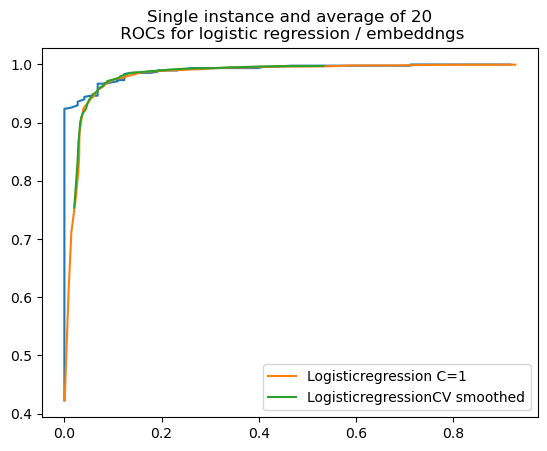

In [191]:
plt.plot(tpr, fpr)
plt.plot(tprs.mean(axis=0), fprs.mean(axis=0), label = "Logisticregression C=1")
plt.plot(tpr_CV.mean(axis=0), fpr_CV.mean(axis=0), label="LogisticregressionCV smoothed")
plt.legend()
plt.title("Single instance and average of 20\n ROCs for logistic regression / embeddngs")

In [196]:
tpr_SVC, fpr_SVC = get_smooth_roc(SVC, 10)

0


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


1


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


2


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


3


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


4


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


5


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


6


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


7


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


8


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


9


/Users/wltrimbl/miniconda3/envs/scipy/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Text(0.5, 1.0, 'Single instance and average of 20\n ROCs for logistic regression / embeddngs')

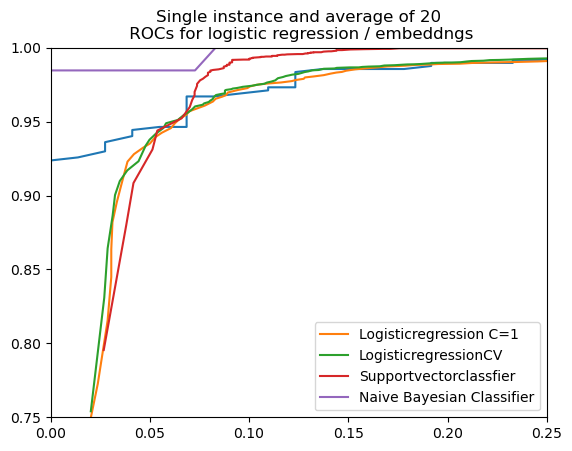

In [212]:
plt.plot(tpr, fpr)
plt.plot(tprs.mean(axis=0), fprs.mean(axis=0), label = "Logisticregression C=1")
plt.plot(tpr_CV.mean(axis=0), fpr_CV.mean(axis=0), label="LogisticregressionCV")
plt.plot(tpr_SVC.mean(axis=0), fpr_SVC.mean(axis=0), label="Supportvectorclassfier")
plt.plot(fpr4,tpr4, label="Naive Bayesian Classifier")

plt.xlim(0,0.25)
plt.ylim(0.75,1)
plt.legend()
plt.title("Single instance and average of 20\n ROCs for logistic regression / embeddngs")

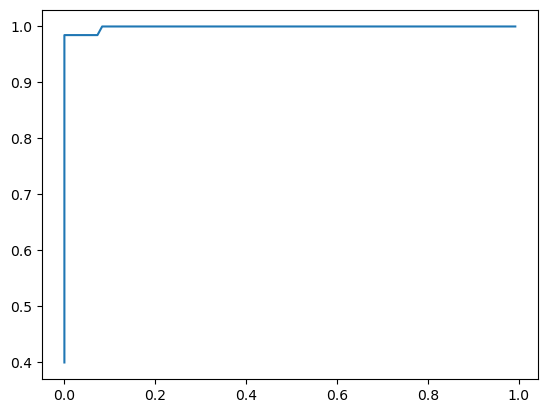

In [211]:
plt.plot(fpr4, tpr4)

In [233]:
score("FREE"), score("yesterday")

(-6.643856189774725, 1.8272198821981491)

In [ ]:
# So I can repeat this trick (repeating the train/test split code + running
# the classifer a bunch of times to reduce the variance of the accuracy estimate)
# for NBC...

In [209]:
fpr4, tpr4, threshnbc = roc_curve2(nbc_scores, Ytest, thresholds_nbc) 

In [207]:
NBC_SCORES = V.apply(score)

NameError: name 'V' is not defined

In [222]:
spam_test, spam_train, d1, d2 = assign_d1_d2()
spam_train

,label,text,V
2672,ham,Yes. They replied my mail. I'm going to the ma...,"[0.05489773220486111, 0.048194037543402776, 0...."
4650,ham,"We are okay. Going to sleep now. Later,,,\n","[-0.06516810825892858, 0.0799560546875, 0.0596..."
1012,ham,Lol I would but my mom would have a fit and te...,"[0.017015245225694444, 0.020964728461371526, 0..."
4508,ham,"When are you guys leaving?,,,\n","[0.052099609375, 0.076171875, 0.0862548828125,..."
5192,spam,ree entry in 2 a weekly comp for a chance to w...,"[-0.0649871826171875, 0.008616129557291666, -0..."
...,...,...,...
810,ham,"I am taking half day leave bec i am not well,,,\n","[-0.053644353693181816, -0.0023886940696022725..."
2487,ham,Lol that's different. I don't go trying to fin...,"[0.028759765625, 0.0508758544921875, -0.010457..."
3932,ham,I thk Ì_ gotta go home by urself. Cos i'll b g...,"[0.015169031479779412, 0.06532915900735294, 0...."
3212,ham,"""She said,'' do u mind if I go into the bedroo...","[0.028410812904094827, 0.01741185681573276, 0...."


In [241]:
tpr_NBC = []
fpr_NBC = []
for i in range(30):
    print(i)
    spam_test, spam_train, d1, d2 = assign_d1_d2()
    Ytrain = spam_train.loc[:,"label"] == "spam" 
    Xtrain = spam_train.loc[:,"text"]
    Ytest = spam_test.loc[:,"label"] == "spam" 
    Xtest = spam_test.loc[:,"text"]
    nbc_scores = Xtest.apply(score)
    tpr, fpr, threshnbc = roc_curve2(nbc_scores, Ytest, thresholds_nbc) 
    fpr_NBC.append(fpr)
    tpr_NBC.append(tpr)
tpr_NBC=np.array(tpr_NBC)
fpr_NBC=np.array(fpr_NBC)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


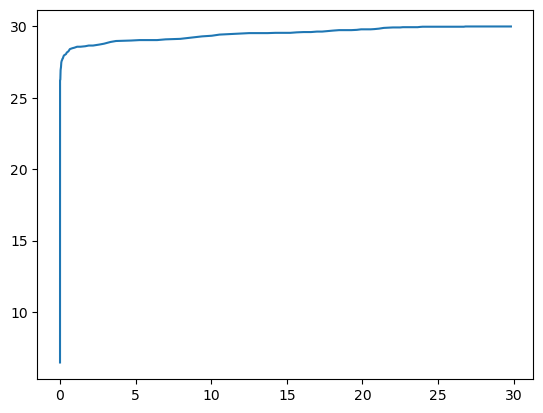

In [242]:
plt.plot(tpr_NBC.sum(axis=0), fpr_NBC.sum(axis=0))


Text(0.5, 1.0, 'Single instance and average of 20\n ROCs for logistic regression / embeddngs')

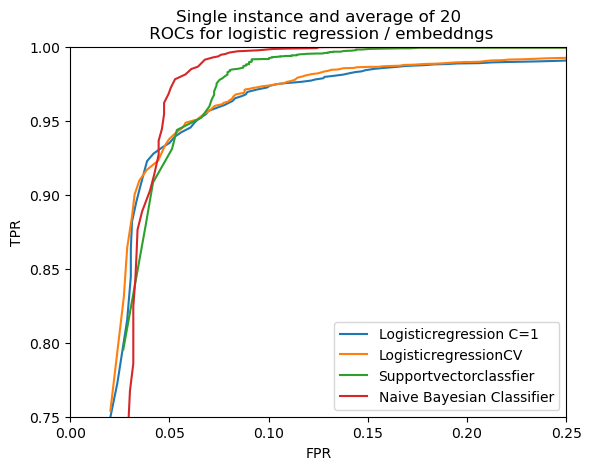

In [244]:
#plt.plot(tpr, fpr)
plt.plot(tprs.mean(axis=0), fprs.mean(axis=0), label = "Logisticregression C=1")
plt.plot(tpr_CV.mean(axis=0), fpr_CV.mean(axis=0), label="LogisticregressionCV")
plt.plot(tpr_SVC.mean(axis=0), fpr_SVC.mean(axis=0), label="Supportvectorclassfier")
plt.plot(1-fpr_NBC.mean(axis=0), 1-tpr_NBC.mean(axis=0), label="Naive Bayesian Classifier")

plt.xlim(0,0.25)
plt.ylim(0.75,1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.title("Single instance and average of 20\n ROCs for logistic regression / embeddngs")

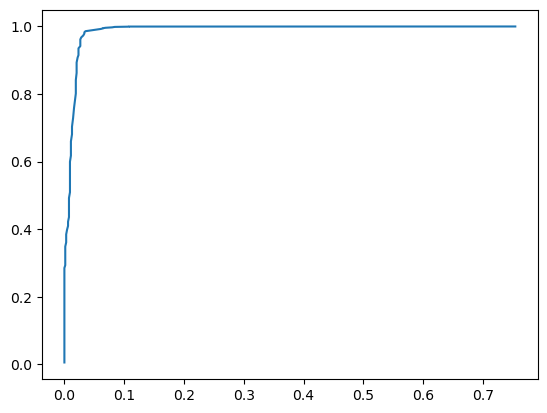

In [239]:
plt.plot(1-fpr_NBC.mean(axis=0), 1-tpr_NBC.mean(axis=0), label="Naive Bayesian Classifier")
